## Выпускная работа специалиста по Data Sciecnce

# Отчёт по решению

# Введение

        В наше время задачи машинного обучения и анализа данных плотно внедрились во многие области жизни и выполняют уже не только узкие задачи для специалистов, но и полноценно участвуют в принятии решений бизнеса, активно влияют на социальную  и даже политическую жизнь.
        Современные инструменты позволяют обрабатывать огромные массивы тектовых данных и изображений, что при накоплении базы знаний позволяет использовать их там, где человек уже не справляется классическими методами. Яркими примерами являются увеличение различных метрик на 0.1% или определение сорта огурцов по потоковому изображению с конвеера. Выявляя мельчайшие детали и отлавливая незаметные глазу изменения, алгоритмы машинного обучения позволяют повысить конкурентность бизнеса и сократить издержки даже в тех сферах, которые существуют столетиями. Одной из таких сфер является плавление различных металлов. 

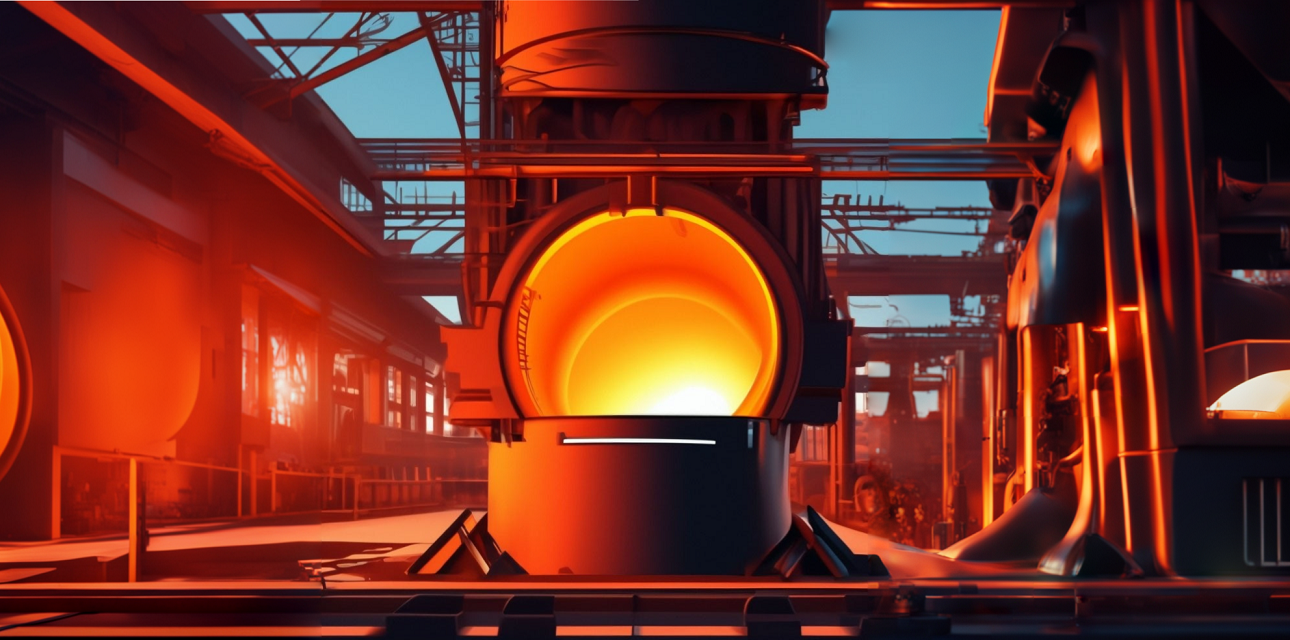

# Постановка задачи

        Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Целью данной работы являлось подбор модели, которая предскажет температуру стали.
        
        Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

        Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

        Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

        Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).


        Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

     Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

# План работы

```
1. Подготовьте данные
    1.1. Открыть файлы и изучить их.
    1.2. Проверить адекватность и разнообразие данных. Описать выводы.
    1.3. Проанализировать признаки в наличии. Сменить типы данных, в частности дату на дату.
    1.4. Провести первичную предобработку данных, в том числе по возможности заполнить пропуски и убрать выбросы, проверить дубликаты.
    1.5 Заполинть пропуски в таблицах wire и bulk нулями.
    1.6 Избавиться от данных, который не содержат финальную температуру.
2. Провести анализ данных
    2.1. Объеденить данные в таблицу по ключу и добавленным материалам bulk/wire. Добавить начальную/конечную температуру. Добавить время нагрева, добавить количество нагревов, добавить агрегированную мощность. За изначальную таблицу мы возьмем агрегированный сводную таблицу по температуре и объеденим её с данными по материалам и газу. Удалим строки без финальной температуры и скорректируем выбросы по температуре. Проверим, что "max" температура равна "last" температуре.
3. Построить модель
    3.1. В соответствии с требованиями тим-лида итоговая метрика MAE. Подготовим выборки (75 на 25).
    3.2. Подготовить данные для модели - по необходимости масштабирование, OHE и прочее. 
    3.3. Обучить различные модели и оценить их качество кросс-валидацией. Выбрать лучшую модель и проверьте её на тестовой выборке, если таковая будет. В случае остуствия тестовой выборки, сделать и использовать валидационную выборку.
    3.4 Сравнить с dummy-моделями.
4. Выводы
5. Отчет (с фото жар-птицы)
```

        План работы, описаный, описанный выше, был скорректирован в процессе работы по ходу исследования данных. В частности, за изначальную таблицу была взята агрегированная таблица по мощностям и увеличено количество синтетических признаков.

# Анализ и подготовка данных.

        В ходе анализа данных было выявлено, что не все партии металла содержат целевой признак. Так же было вявлено, что не всегда температура в ковше в процессе обработки растет. В некоторых партиях происходит несколько замеров температуры после окончания нагрева материала с помощью электродов.
        После обработки данных, в наличии оказались лишь данные по 2210 партиям стали из изначальных 3241.
        Согласно плана, было принято решение объеденить в единую таблицу по ключу все уникальные признаки. Так же были добавлены синтетические признаки, полученные комбинацией уникальных.

        Рабочей гипотезой было то, что при добавлении материалов происходит слабая химическая реакция, влияющая на температуру. При нагреве образцов проиходит несколько циклов термической реакции, сильно влияющих на температуру. Если количество интервалов между этими циклами значительное, то температура образца будет постепенно падать. Если замер произошел сильно позже последнего нагрева, то температура будет ниже, чем если произошел непосредственно после нагрева.
        Так же в данных присутсвуют ключи, в которых был единственный нагрев, а после в уже нагретую сталь добавлялись материалы. Таким образом, есть вероятность, что у нас в наличии не все данные по нагреву электродами, поэтому вместо суммарной мощности лучше взять среднюю, которая в сочетании с временем нагрева и простоя позволит модели найти лучшие коэффициенты.
        При подготовке данных трудностей не возникло.

Уникальные признаки: 

 - first_temp - температура первого замера;
 - act_power_first - активная мощность первого нагрева;
 - act_power_last - активная мощность последнего нагрева;
 - react_power_first - реактивная мощность первого нагрева;
 - react_power_last - реактивная мощность последнего нагрева;
 - Bulk 1 - Bulk 15 - количество сухих материалов на партию;
 - gas - данные о продувке сплава газом;
 - Wire 1 - Wire 9 - данные о количестве проволочных материалов.

Синтетические признаки:
 - count_measure_temp_steps - количество замеров температуры;
 - act_power_mean - средня активная мощность нагрева;
 - react_power_mean - средня реактивная мощность нагрева;
 - heat_time_mean - среднее время работы электродов во время циклов нагрева образца;
 - heat_time_sum - общее вермя работы электродов на один образец;  
 - full_power_mean - расчетная средняя полная мощность;
 - full_power_first - расчетная полная мощность при первом нагреве;
 - full_power_last - асчетная полная мощность при последнем нагреве;
 - cycle_time - количество секунд между началом первого нагрева и окончанием последнего;
 - cool_time - время охлаждения образца между циклами нагрева, рассчитанное как разница между временем цикла и общим временем нагрева;
 - diff_btwn_heat_and_measure_last - количество секунд между окончанием последнего нагрева образца и целевого (последнего) замера температуры. 
 
Целевой признак:
 - last_temp - последняя температура.

# Подготовка и тестирование моделей

        Для начальной проработки были выбраны модель линейной регресси и модель градиентного бустинка CatBoost.
        После разделения на обучающую и тестовую выборку была испытана первая модель - CatBoostRegressor.
        В ходе подбора гиперпараметров было выявлено, что параметр n_estimator сильнее всего влияет на точность модели.

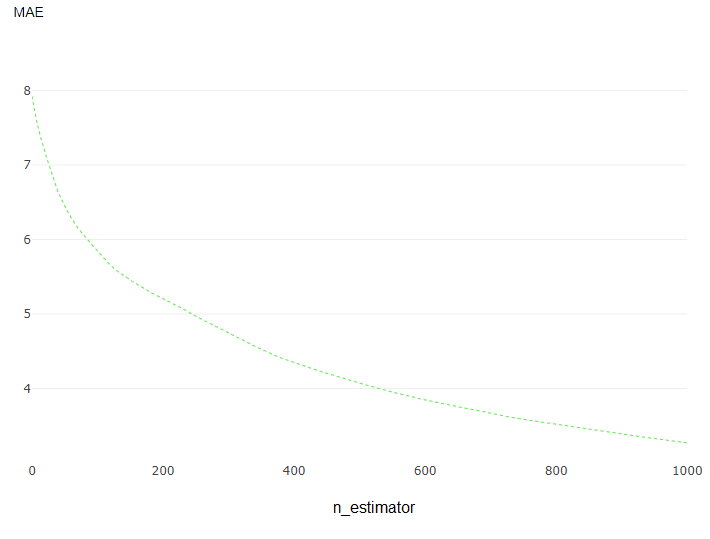

```python
Параметры модели: CatBoostRegressor(loss_function="MAE",l2_leaf_reg = 3, max_depth = 5, n_estimators = 1000)
```
        Полученная на тренировочной модели методом кросс-валидации целевая метрика средней абсолютной ошибки МАE равна 5.76

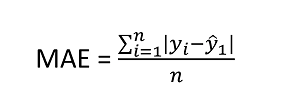

При рассмотрении целевых параметров, было выявлено, что ключевую роль в точности алгоритма сыграли следующие признаки:
 - Начальная температура;
 - Общее время нагрева ковша;
 - Проволочный материал 1;
 - Средняя активная мощность;
 - Проволочный материал 2;


Ниже приведен график вклада признаков в расчеты модели.

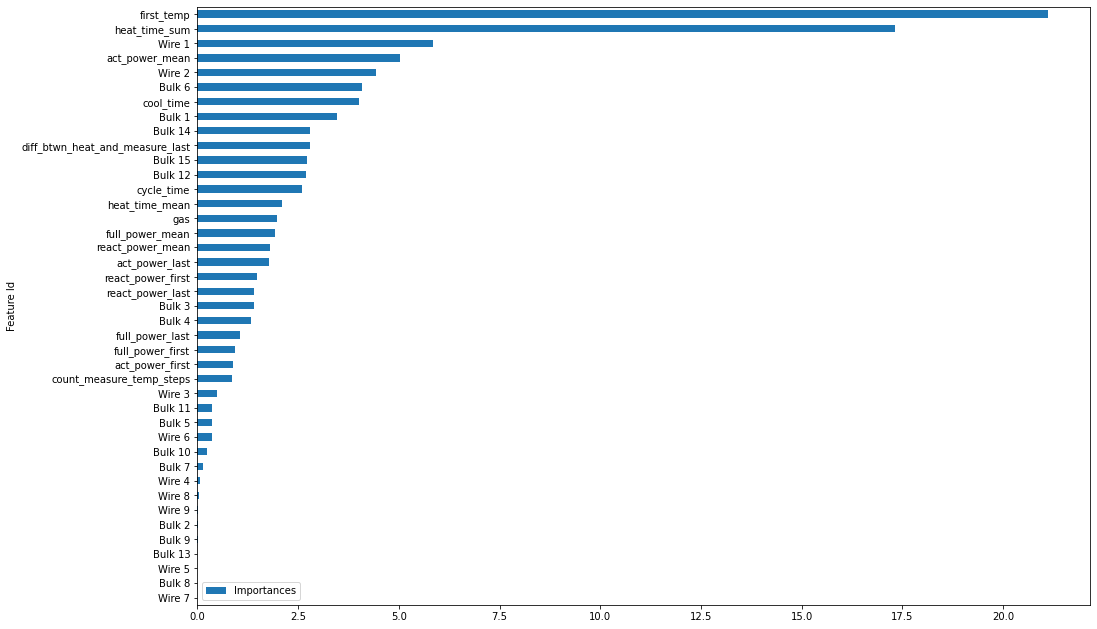

        Для модели линейной регрессии были исключены взаимокорелирующие признаки и было проведено их масштабирование. Результат линейной регрессии на кросс-валидации тренировочной выборки - 5,77.

        Для проверки адекватности модели было проведено сравнение со средним значением.
        МАЕ при заполнении целевого признака средним значением - 8.03.

# Финальное тестирование лучшей модели

        При проверки качества модели на тестовой выборке получен результат МАЕ = 5.47, для модели: 
            CatBoostRegressor c параметрами: l2_leaf_reg = 3, max_depth = 5, n_estimators = 1000

# Вывод

        В данной работе был проведен анализ и предобработка данных по плавлению стали с добавлением компонентов и для легирования и корректировки химического состава.
    
        В ходе работы данные были объеденены по партиям и содержали в себе как уникальные признаки (количество материалов, газа, замеров и начальные температуры), так и синтетические признаки, такие как средняя общая мощность нагрева, общее время нагрева, время подготовки партии, время между финальным замером и последним нагревом.
    
        Целью работы являась подготовка агоритма машинного обучения (регрессия) для предсказания финальной температуры стали, что в будущем позволит экономить электроэнергию.
    
        Ключевой метрикой для заказчика являлась cредняя абсолютная ошибка. 
    
        После подготовки признаков и устранения выбросов, были применены два модели машинного обучения - линейная регрессия и CatBoost на основе градиентного бустинга. Так же была проведена контрольная проверка резкльтатов с помощью оценки MAE на среднем значении, которая подтвердила хорошее качество выбранных алгоритмов.
    
        Обе модели показали хорошие результаты, качество финальной модели CatBoost на 0,13 MAE выше, чем у линейной регрессии. При расширении количества данных по партиям и увеличения уникальных признаков рекомендуется провести контроль различия моделей, поскольку результат линейной регрессии практически не отличается от CatBoost, но работает намного быстрее.
   

<div class = "alert alert-success" style="border-left: 14px green">
<b> Приложение 1. Ход выполнения работ по проекту </b>
</div>

## План работы

```python
0. Добавить содержание и описание проекта.
1. Подготовьте данные
    1.1. Открыть файлы и изучить их.
    1.2. Проверить адекватность и разнообразие данных. Описать выводы.
    1.3. Проанализировать признаки в наличии. Сменить типы данных, в частности дату на дату.
    1.4. Провести первичную предобработку данных, в том числе по возможности заполнить пропуски и убрать выбросы, проверить дубликаты.
    1.5 Заполинть пропуски в таблицах wire и bulk нулями.
    1.6 Избавиться от данных, который не содержат финальную температуру.
2. Провести анализ данных
    2.1. Объеденить данные в таблицу по ключу и добавленным материалам bulk/wire. Добавить начальную/конечную температуру. Добавить время нагрева, добавить количество нагревов, добавить агрегированную мощность. За изначальную таблицу мы возьмем агрегированный pivot_table по температуре, который использовали выше и "подошьём" к нему материалы и газ. Удалим строки без финальной температуры и скорректируем некорректную температуру. Проверим, что "max" температура равна "last" температуре.
3. Построить модель
    3.1. В соответствии с требованиями тим-лида итоговая метрика MAE. Подготовим выборки (75 на 25).
    3.2. Подготовить данные для модели - по необходимости масштабирование, OHE и прочее. 
    3.3. Обучить различные модели и оценить их качество кросс-валидацией. Выбрать лучшую модель и проверьте её на тестовой выборке, если таковая будет. В случае остуствия тестовой выборки, сделать и использовать валидационную выборку.
    3.4 Сравнить с dummy-моделями.
4. Выводы
5. Отчет (Переместить в начало работы)

```

##  Требования по выполнению технического задания от представителя заказчика

1.	Тестовая выборка 25%
2.	Кросс-валидация при подборе метода
3.	Прогнозируем финальную температуру
4.	Метрика - MAE
5.	Избавляется от ключа данных при некорректности данных или невозможности их востановить.
6.	Соотношение активной/рекативной мощности найти и востановить реактивную мощность, если есть желание.
7.	Температура стали не может быть ниже 1500 градусов. Всё что ниже - выброс.
8.	Кроме температутры и реактивной мощности - выбросов в данных нет.
9.	Убирать данные можно только из тренировочной выборки.
10.	В датасетах разное количество наблюдений. Нужны только те наблюдения, которые есть во всех датасетах. Объединять таблицы в единую нужно учитывая это (inner join).

11.	В финальном датасете на один ключ - одно наблюдение. Нужно будет агрегировать мощности. Лучше всего агрегировать по среднему значению. 

12.	Не забыть генерацию новых признаков. Например полную мощность, которая равна корню из суммы квадратов активной/реактивной мощности.

13.	Выбираем минимум две модели - простую и сложную. Для линейной регрессии нужно масштабировать выборку из-за мультиколлинеарности.

14.	У нас не временные ряды, время не может быть признаком. Можно сгенерировать признак длительности нагрева. Время нужно, чтобы выстроить температуру начальную и конечную.

15.	Bulk 8 с единичным наблюдением можно и выкинуть. Но в целом это всё отдельные признаки, котоыре не стоит агрегировать. Можно создать признак - сумма.

16.	Пропуски в bulk заполняем нулями, и желательно это сделать до объединения таблиц (по inner join просто потеряем строки).

17.	Про wire всё тоже самое.

18.	В отчете надо ответить на 4 вопроса. Суть отчета - описать основные шаги, выполненные в задании.


## Описание проекта

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Вам предстоит построить модель, которая предскажет температуру стали.

### Описание этапа обработки

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

## Анализ данных

In [1]:
#анализ данных
import pandas as pd
import math
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#модели
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder 
from catboost import CatBoostRegressor 
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor #для проверки адекватности модели
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [3]:
#- `data_arc.csv` — данные об электродах;
#- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
#- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
#- `data_gas.csv` — данные о продувке сплава газом;
#- `data_temp.csv` — результаты измерения температуры;
#- `data_wire.csv` — данные о проволочных материалах (объём);
#- `data_wire_time.csv` — данные о проволочных материалах (время).

pd.set_option("display.precision", 7)

try:
    data_arc = pd.read_csv('C://datasets/final_steel/data_arc.csv')
    data_bulk = pd.read_csv('C://datasets/final_steel/data_bulk.csv')
    data_bulk_time = pd.read_csv('C://datasets/final_steel/data_bulk_time.csv')
    data_gas = pd.read_csv('C://datasets/final_steel/data_gas.csv')
    data_temp = pd.read_csv('C://datasets/final_steel/data_temp.csv')
    data_wire = pd.read_csv('C://datasets/final_steel/data_wire.csv')
    data_wire_time = pd.read_csv('C://datasets/final_steel/data_wire_time.csv')

except:
    data_arc = pd.read_csv('/datasets/final_steel/data_arc.csv')
    data_bulk = pd.read_csv('/datasets/final_steel/data_bulk.csv')
    data_bulk_time = pd.read_csv('/datasets/final_steel/data_bulk_time.csv')
    data_gas = pd.read_csv('/datasets/final_steel/data_gas.csv')
    data_temp = pd.read_csv('/datasets/final_steel/data_temp.csv')
    data_wire = pd.read_csv('/datasets/final_steel/data_wire.csv')
    data_wire_time = pd.read_csv('/datasets/final_steel/data_wire_time.csv')


In [4]:
display(data_arc.head(2))
display(data_bulk.head(2))
display(data_bulk_time.head(2))
display(data_wire.head(2))
display(data_wire_time.head(2))
display(data_gas.head(2))
display(data_temp.head(2))

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.9760588,0.6870837
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.8056071,0.5202852


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,key,Газ 1
0,1,29.7499859
1,2,12.5555610


,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0


- Данные разделены на несколько таблиц, связь между которыми держится по ключу;
- В отдельных таблицах лежат время подачи и количество добавок Bulk и Wire;
- Есть данные по нагрвевам и приложенным мощностям;
- Временной ряд замеров;
- Количество потраченного газа.

    Попробуем графически визуализировать на временной шкале процесс для случайного ключа.

In [5]:
k = 1703

display(data_arc.query('key == @k'))
display(data_bulk.query('key == @k'))
display(data_bulk_time.query('key == @k'))
display(data_wire.query('key == @k'))
display(data_wire_time.query('key == @k'))
display(data_gas.query('key == @k'))
display(data_temp.query('key == @k'))


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
7865,1703,2019-07-03 00:35:18,2019-07-03 00:37:20,0.3985268,0.3325004
7866,1703,2019-07-03 00:40:05,2019-07-03 00:45:24,1.3170296,0.9988031
7867,1703,2019-07-03 00:47:35,2019-07-03 00:52:20,1.2097803,0.8450265
7868,1703,2019-07-03 00:53:45,2019-07-03 00:54:14,0.1187110,0.0834303
7869,1703,2019-07-03 01:03:05,2019-07-03 01:04:07,0.2000231,0.1541799
7870,1703,2019-07-03 01:05:33,2019-07-03 01:10:47,1.2619560,0.9058366
7871,1703,2019-07-03 01:22:52,2019-07-03 01:24:11,0.3375671,0.2312831


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
1643,1703,NaN,NaN,NaN,130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,461.0,NaN,219.0,204.0


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
1643,1703,NaN,NaN,NaN,2019-07-03 00:47:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-03 00:41:11,NaN,2019-07-03 00:41:11,2019-07-03 00:41:11


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
1623,1703,161.225994,20.17704,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
1623,1703,2019-07-03 00:47:23,2019-07-03 01:22:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,key,Газ 1
1700,1703,11.9210899


,key,Время замера,Температура
8386,1703,2019-07-03 00:38:16,1600.0
8387,1703,2019-07-03 00:46:55,1593.0
8388,1703,2019-07-03 01:05:12,1607.0
8389,1703,2019-07-03 01:21:02,1617.0
8390,1703,2019-07-03 01:29:09,1620.0


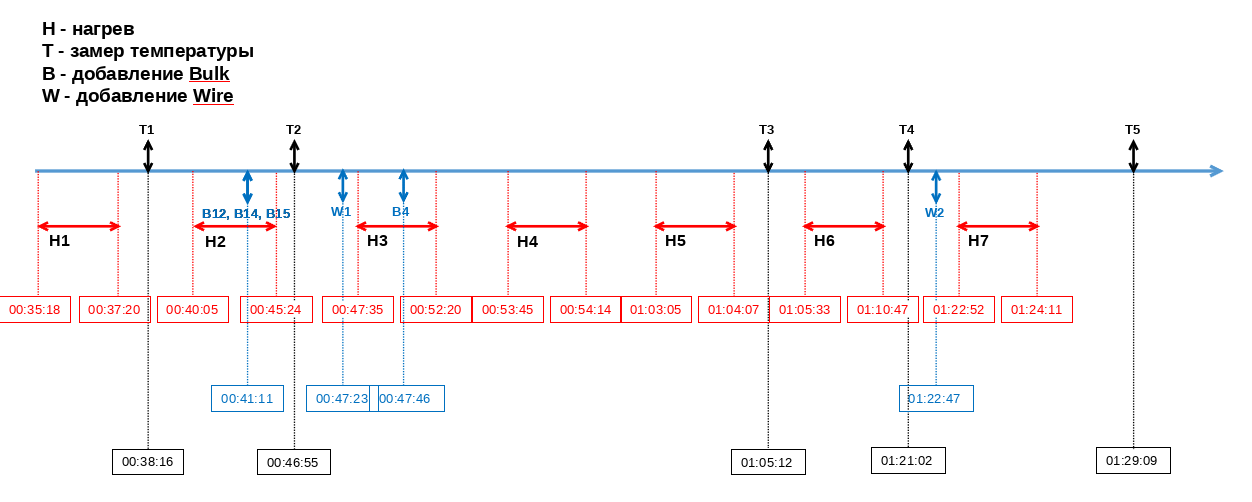

In [6]:
display(data_arc.info())
display(data_bulk.info())
display(data_bulk_time.info())
display(data_gas.info())
display(data_temp.info())
display(data_wire.info())
display(data_wire_time.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           15907 non-null  int64  
 1   Время замера  15907 non-null  object 
 2   Температура   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


None

In [7]:
print('Уникальных ключей', 'в data_arc', len(data_arc['key'].unique()), 'из', len(data_arc))
print('data_bulk', len(data_bulk['key'].unique()), 'из', len(data_bulk))
print('data_bulk_time', len(data_bulk_time['key'].unique()), 'из', len(data_bulk_time))
print('data_temp', len(data_temp['key'].unique()), 'из', len(data_temp))
print('data_wire', len(data_wire['key'].unique()), 'из', len(data_wire))
print('data_wire_time', len(data_wire_time['key'].unique()), 'из', len(data_wire_time))
print('data_gas', len(data_gas['key'].unique()), 'из', len(data_gas))



Уникальных ключей в data_arc 3214 из 14876
data_bulk 3129 из 3129
data_bulk_time 3129 из 3129
data_temp 3216 из 15907
data_wire 3081 из 3081
data_wire_time 3081 из 3081
data_gas 3239 из 3239


 - По информации от заказчика, пропусков в data_wire и data_bulk нет;
 - Это значит, что отсутствующие ключи - образцы в которые не добавляли материалы;
 - Напишем функцию для анализа данных.

In [8]:
def data_distribution(data, name, color):
    plt.figure(figsize = (14, 2))
    h = sns.boxplot(x = data[name],
            data = data,
            linewidth=2.5,
            width=0.5)
    plt.xlabel(f'{name}', fontsize=12)
    plt.title(f'Выбросы в признаке \'{name}\'', fontsize = 12)
    h.tick_params(axis='x', labelrotation=0, labelsize=12)
    h.set_facecolor(color)
    plt.show()

    plt.figure(figsize = (12,6))
    h = data[name].plot(
        kind = 'hist', bins = 50, label = name,
        legend = False, grid = True, color = color,
        edgecolor='darkblue', linewidth=1.2
        )
    plt.title(f'Распределение значений в признаке\n \'{name}\'', fontsize = 12)
    plt.xlabel(f'{name}', fontsize=12)
    plt.ylabel('Частота встречаемости', fontsize=12)
    plt.show()

### data_arc

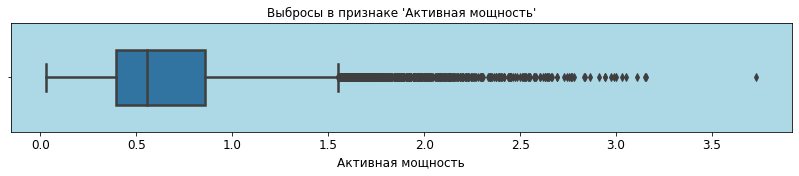

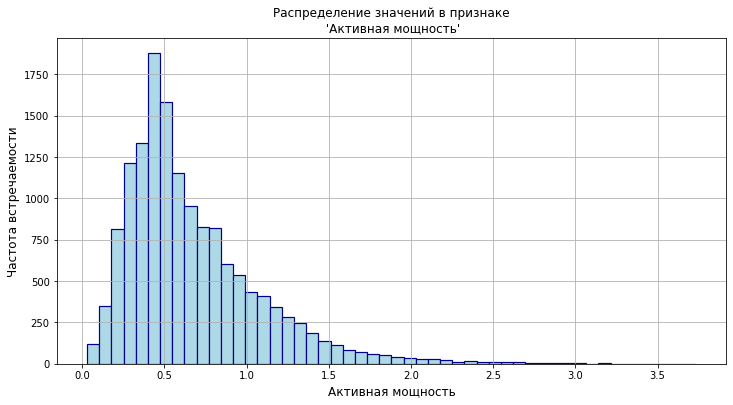

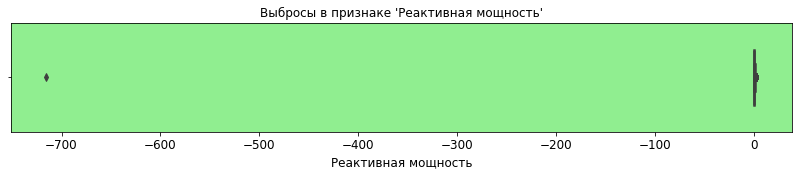

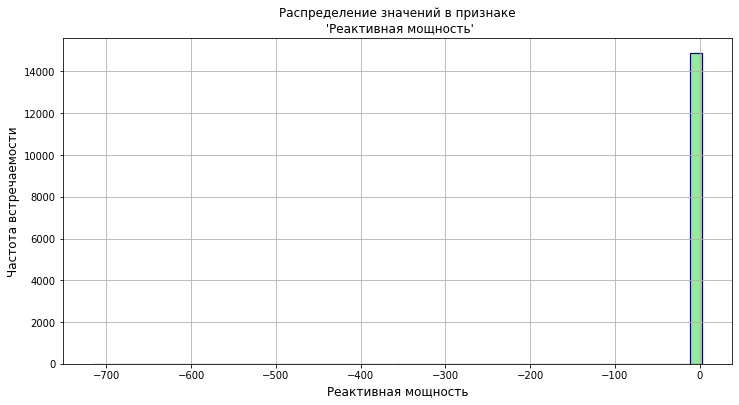

In [9]:
data_distribution(data_arc, 'Активная мощность','lightblue')
data_distribution(data_arc, 'Реактивная мощность','lightgreen')

In [10]:
data_arc['Реактивная мощность'].sort_values()

9780    -715.5049242
5596       0.0208063
2419       0.0211542
4914       0.0224850
4633       0.0229829
            ...     
13760      2.3350884
12424      2.3970323
9361       2.4599591
9226       2.5042061
7799       2.6763875
Name: Реактивная мощность, Length: 14876, dtype: float64

In [11]:
data_arc.loc[9780, 'Реактивная мощность'] = data_arc[data_arc['Реактивная мощность'] > 0]['Реактивная мощность'].median()

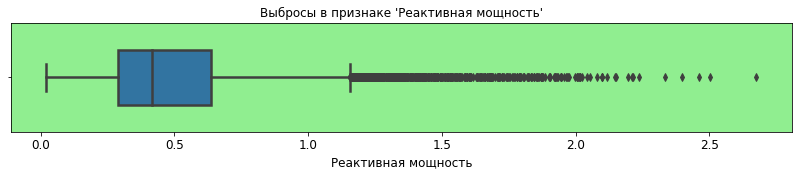

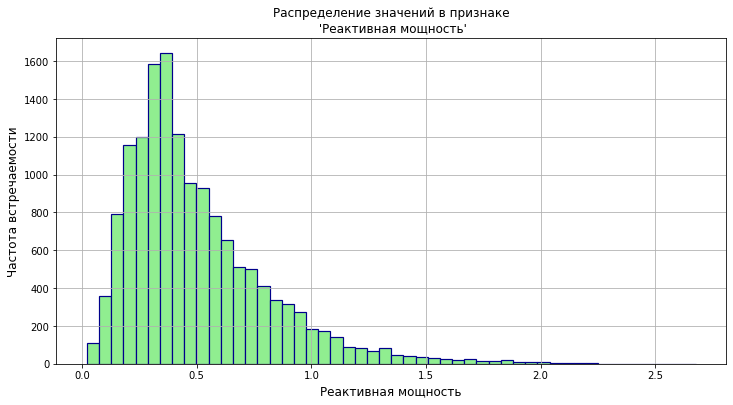

In [12]:
data_distribution(data_arc, 'Реактивная мощность','lightgreen')

- Этот целый один выброс в реактивной мощности заменили на медианное значение.
- В активной мощности как таковых выбросов нет.
- Посмотрим, сколько уникальных ключей в каждом наборе данных.   

In [13]:
data_arc['key'].value_counts()

2108    16
1689    15
1513    15
2567    14
46      13
        ..
977      1
247      1
2582     1
248      1
530      1
Name: key, Length: 3214, dtype: int64

- Некоторые образцы нагрвеали больше 10 раз, другие - лишь один.

### data_temp

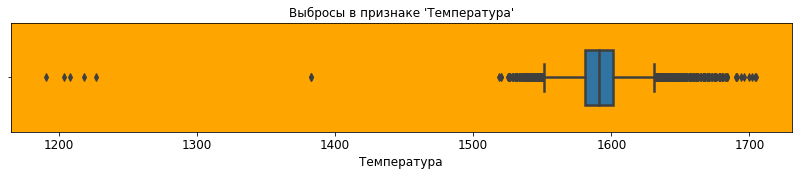

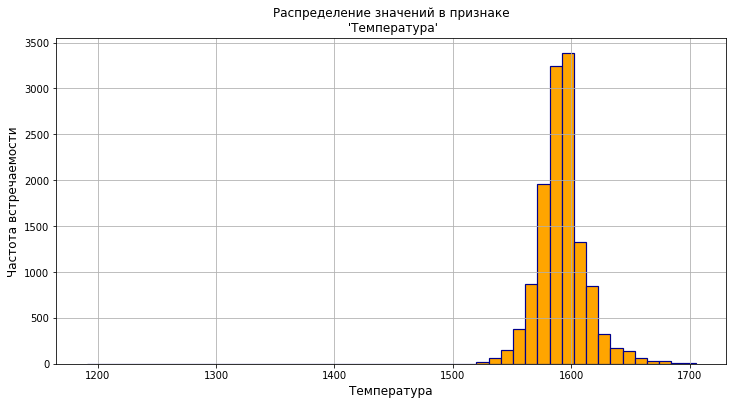

In [14]:
data_distribution(data_temp, 'Температура','orange')

- По информации от заказчика мы знаем, что температуры ниже 1500 градусов быть не может, а занчит в данных есть небольшое количество выбросов.

In [15]:
temp_pivot = data_temp.pivot_table(
    index = ['key'], values = 'Температура', aggfunc = ['first', 'last', 'mean','count'])
temp_pivot['heat_diff'] = temp_pivot['last'] - temp_pivot['first']
display(temp_pivot)

,first,last,mean,count,heat_diff
,Температура,Температура,Температура,Температура,
key,,,,,
1,1571.0,1613.0,1601.4000000,5,42.0
2,1581.0,1602.0,1593.5000000,6,21.0
3,1596.0,1599.0,1597.8000000,5,3.0
4,1601.0,1625.0,1616.3333333,3,24.0
5,1576.0,1602.0,1589.0000000,2,26.0
...,...,...,...,...,...
3237,1569.0,1569.0,1569.0000000,1,0.0
3238,1584.0,1584.0,1584.0000000,1,0.0


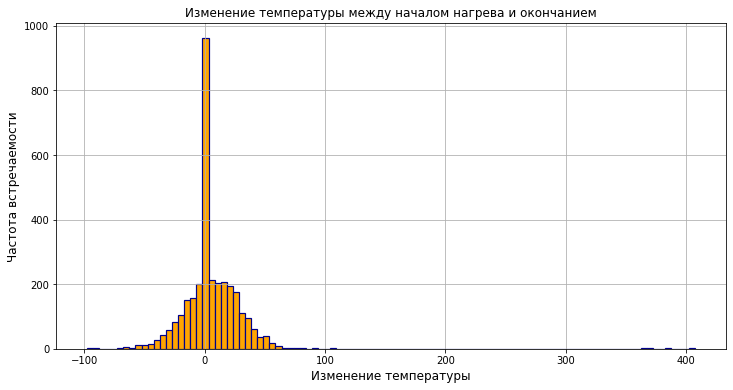

In [16]:
plt.figure(figsize = (12,6))
h = temp_pivot['heat_diff'].plot(
        kind = 'hist', bins = 100, label = 'Изменение температуры между началом нагрева и окончанием',
        legend = False, grid = True, color = 'orange',
        edgecolor='darkblue', linewidth=1.2
        )
plt.title('Изменение температуры между началом нагрева и окончанием', fontsize = 12)
plt.xlabel('Изменение температуры', fontsize=12)
plt.ylabel('Частота встречаемости', fontsize=12)
plt.show()

In [17]:
_bad_index = temp_pivot[(temp_pivot[('count', 'Температура')] <2)].index.to_list()
len(_bad_index)

741

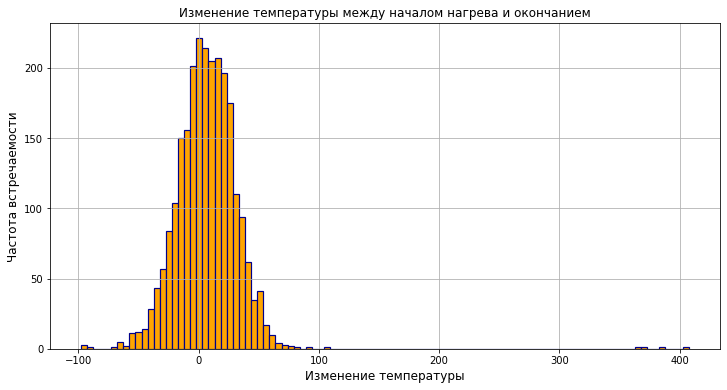

In [18]:
plt.figure(figsize = (12,6))
h = temp_pivot[temp_pivot[('count', 'Температура')] >1]['heat_diff'].plot(
        kind = 'hist', bins = 100, label = 'Изменение температуры между началом нагрева и окончанием',
        legend = False, grid = True, color = 'orange',
        edgecolor='darkblue', linewidth=1.2
        )
plt.title('Изменение температуры между началом нагрева и окончанием', fontsize = 12)
plt.xlabel('Изменение температуры', fontsize=12)
plt.ylabel('Частота встречаемости', fontsize=12)
plt.show()

- Выбросов очень мало, обработаем их вручную через средние. У нас есть среднее значение за нагрев, у нас есть количество нагревов.
- У 741 ключа отсутсвует более одного замера температуры, таким образом, исходя из требований заказчика, мы исключим эти данные из работы.
- Как мы видим, температура может как расти, так и падать при обработке металла. Необходимо это учитывать.

### data_temp и data_wire

In [19]:
data_bulk.head(15)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
5,6,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,201.0,154.0
6,7,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,152.0,154.0
7,8,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410.0,NaN,252.0,153.0
8,9,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.0,NaN,99.0,203.0
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,102.0,204.0


In [20]:
data_bulk_time.head(15)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56
5,6,NaN,NaN,NaN,2019-05-03 13:59:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:53:27,NaN,2019-05-03 13:53:27,2019-05-03 13:53:27
6,7,NaN,NaN,NaN,2019-05-03 14:29:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 14:22:19,NaN,2019-05-03 14:22:19,2019-05-03 14:22:19
7,8,NaN,NaN,NaN,2019-05-03 15:04:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 14:55:46,NaN,2019-05-03 14:55:46,2019-05-03 14:55:46
8,9,NaN,NaN,NaN,2019-05-03 15:47:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 15:41:00,NaN,2019-05-03 15:41:00,2019-05-03 15:41:00
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 16:18:52,NaN,2019-05-03 16:18:52,2019-05-03 16:18:52


In [21]:
data_wire.head(15)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,99.109917,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,98.061600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,155.282394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,113.393279,9.143681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,81.244796,12.376000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
data_wire_time.head(15)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,2019-05-03 13:59:02,2019-05-03 13:59:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,2019-05-03 14:28:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,2019-05-03 15:03:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2019-05-03 15:42:43,2019-05-03 15:58:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,2019-05-03 16:20:25,2019-05-03 16:21:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- По информации от заказчика, эти данные не содержат пропусков и аномалий;
- Отсутсвующие значения необходимо заполнить нулями;
- По информации от заказчика, таблицы с временем подачи хим реагентов использовать не нужно.

### data_gas

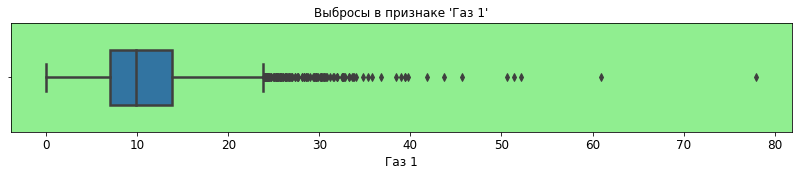

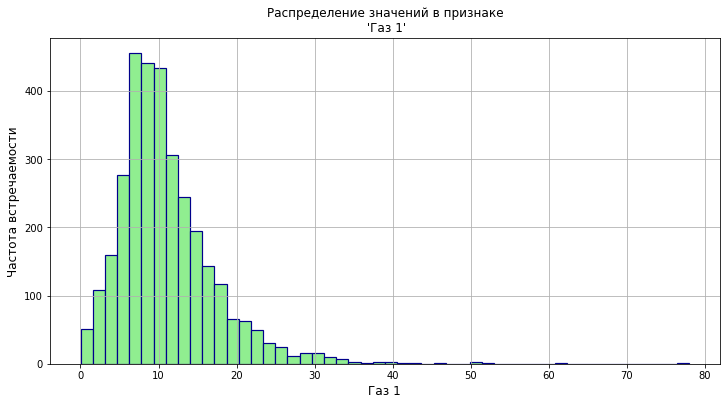

In [23]:
data_distribution(data_gas, 'Газ 1', 'lightgreen')

- По информации от заказчика, пропусков и выбрасов в данных по газу нет.

Подытог:

1) У нас есть данные по количеству, времени и мощности нагревов. Выбросы будем обрабатывать вручную или выкидывать, поглядим по результатам.
    
2) Целевым признаком является финальная температура, те данные, где её нет - выкидываем.
    
3) Как упоминалось в лекции - если у ключа нет данных в таблицах - ключ выкидывается.
    
4) Пропуски в таблицах Wire и Bulk заполняются нулями. Отсутсвие данных в них означает, что этой добавки не подавали.


## Подготовка данных

In [24]:
display(data_arc.info())
display(data_bulk.info())
display(data_bulk_time.info())
display(data_gas.info())
display(data_temp.info())
display(data_wire.info())
display(data_wire_time.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           15907 non-null  int64  
 1   Время замера  15907 non-null  object 
 2   Температура   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


None

Начнем с первого файла с данными. 
    
- добавим столбец с временем нагрева
    
- посмотрим, что можно сделать с выбросом в реактивной мощности
    
- добавим общую мощность

In [25]:
data_arc.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.9760588,0.6870837
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.8056071,0.5202852
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.7443634,0.4988054
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.6593626,1.0626694
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.6927547,0.4143972


In [26]:
data_arc['Начало нагрева дугой'] = pd.to_datetime(data_arc['Начало нагрева дугой'], format='%Y-%m-%d %H:%M:%S')
data_arc['Конец нагрева дугой'] = pd.to_datetime(data_arc['Конец нагрева дугой'], format='%Y-%m-%d %H:%M:%S')

In [27]:
data_arc['heat_time'] = data_arc['Конец нагрева дугой'] - data_arc['Начало нагрева дугой']

In [28]:
data_arc['heat_time'] = data_arc['heat_time'].dt.total_seconds()

In [29]:
data_arc

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,heat_time
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.9760588,0.6870837,228.0
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.8056071,0.5202852,185.0
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.7443634,0.4988054,172.0
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.6593626,1.0626694,365.0
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.6927547,0.4143972,148.0
...,...,...,...,...,...,...
14871,3241,2019-09-01 03:58:58,2019-09-01 04:01:35,0.5336696,0.3544387,157.0
14872,3241,2019-09-01 04:05:04,2019-09-01 04:08:04,0.6766037,0.5236308,180.0
14873,3241,2019-09-01 04:16:41,2019-09-01 04:19:45,0.7338995,0.4756536,184.0
14874,3241,2019-09-01 04:31:51,2019-09-01 04:32:48,0.2206939,0.1457684,57.0


In [30]:
data_arc['full_power'] = (data_arc['Активная мощность']**2 + data_arc['Реактивная мощность']**2)**0.5
data_arc

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,heat_time,full_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.9760588,0.6870837,228.0,1.1936393
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.8056071,0.5202852,185.0,0.9590096
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.7443634,0.4988054,172.0,0.8960378
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.6593626,1.0626694,365.0,1.9704696
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.6927547,0.4143972,148.0,0.8072386
...,...,...,...,...,...,...,...
14871,3241,2019-09-01 03:58:58,2019-09-01 04:01:35,0.5336696,0.3544387,157.0,0.6406481
14872,3241,2019-09-01 04:05:04,2019-09-01 04:08:04,0.6766037,0.5236308,180.0,0.8555593
14873,3241,2019-09-01 04:16:41,2019-09-01 04:19:45,0.7338995,0.4756536,184.0,0.8745598
14874,3241,2019-09-01 04:31:51,2019-09-01 04:32:48,0.2206939,0.1457684,57.0,0.2644886


- К этому датасету вернемся позже для агрегирования. Далее заполним нулями наши bulk и wire.

- Даты тоже заполним для проформы, но использовать их не будем.

In [31]:
data_bulk = data_bulk.fillna(value = 0)
data_bulk_time = data_bulk_time.fillna(value = 0)
display(data_bulk.info())
display(data_bulk_time.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   3129 non-null   float64
 2   Bulk 2   3129 non-null   float64
 3   Bulk 3   3129 non-null   float64
 4   Bulk 4   3129 non-null   float64
 5   Bulk 5   3129 non-null   float64
 6   Bulk 6   3129 non-null   float64
 7   Bulk 7   3129 non-null   float64
 8   Bulk 8   3129 non-null   float64
 9   Bulk 9   3129 non-null   float64
 10  Bulk 10  3129 non-null   float64
 11  Bulk 11  3129 non-null   float64
 12  Bulk 12  3129 non-null   float64
 13  Bulk 13  3129 non-null   float64
 14  Bulk 14  3129 non-null   float64
 15  Bulk 15  3129 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   3129 non-null   object
 2   Bulk 2   3129 non-null   object
 3   Bulk 3   3129 non-null   object
 4   Bulk 4   3129 non-null   object
 5   Bulk 5   3129 non-null   object
 6   Bulk 6   3129 non-null   object
 7   Bulk 7   3129 non-null   object
 8   Bulk 8   3129 non-null   object
 9   Bulk 9   3129 non-null   object
 10  Bulk 10  3129 non-null   object
 11  Bulk 11  3129 non-null   object
 12  Bulk 12  3129 non-null   object
 13  Bulk 13  3129 non-null   object
 14  Bulk 14  3129 non-null   object
 15  Bulk 15  3129 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


None

In [32]:
data_bulk

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0
1,2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0
2,3,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0
3,4,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0
4,5,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,0.0,0.0,170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,252.0,0.0,130.0,206.0
3125,3238,0.0,0.0,126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,254.0,0.0,108.0,106.0
3126,3239,0.0,0.0,0.0,0.0,0.0,114.0,0.0,0.0,0.0,0.0,0.0,158.0,0.0,270.0,88.0
3127,3240,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,192.0,54.0


In [33]:
data_wire = data_wire.fillna(value = 0)
data_wire_time = data_wire_time.fillna(value = 0)
display(data_wire.info())
display(data_wire_time.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3081 non-null   float64
 2   Wire 2  3081 non-null   float64
 3   Wire 3  3081 non-null   float64
 4   Wire 4  3081 non-null   float64
 5   Wire 5  3081 non-null   float64
 6   Wire 6  3081 non-null   float64
 7   Wire 7  3081 non-null   float64
 8   Wire 8  3081 non-null   float64
 9   Wire 9  3081 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3081 non-null   object
 2   Wire 2  3081 non-null   object
 3   Wire 3  3081 non-null   object
 4   Wire 4  3081 non-null   object
 5   Wire 5  3081 non-null   object
 6   Wire 6  3081 non-null   object
 7   Wire 7  3081 non-null   object
 8   Wire 8  3081 non-null   object
 9   Wire 9  3081 non-null   object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


None

In [34]:
data_wire

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3076,3237,38.088959,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3077,3238,56.128799,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3078,3239,143.357761,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3079,3240,34.070400,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
display(data_gas.info())
display(data_gas['key'].duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


None

0

- По заданию заказчика, тестовая выборка будет фомироваться из общей, в связи с чем мы не можем брать максимальную, среднюю, минимальнюу температуры, поскольку это будет утечкой целевого признака.
- Предобработанные данные находятся в таблице temp_pivot, а индексы с единичными замерами - в _bad_index.
- Сведем таблицы через groupby. Необходимо агрегировать дважды, поскольку нам необходимы данные по началу первого и окончанию последнего нагревово, а так же средняя мощность. Однако, агрегировать типа данных "дата" по среднему не получится.

In [36]:
temp_data_arc_1 = data_arc.groupby(by = 'key').agg(['mean', 'sum', 'first', 'last'])
temp_data_arc_2 = data_arc.groupby(by = 'key').agg(['first', 'last'])

display(temp_data_arc_1.columns, temp_data_arc_2.columns)

MultiIndex([(  'Активная мощность',  'mean'),
            (  'Активная мощность',   'sum'),
            (  'Активная мощность', 'first'),
            (  'Активная мощность',  'last'),
            ('Реактивная мощность',  'mean'),
            ('Реактивная мощность',   'sum'),
            ('Реактивная мощность', 'first'),
            ('Реактивная мощность',  'last'),
            (          'heat_time',  'mean'),
            (          'heat_time',   'sum'),
            (          'heat_time', 'first'),
            (          'heat_time',  'last'),
            (         'full_power',  'mean'),
            (         'full_power',   'sum'),
            (         'full_power', 'first'),
            (         'full_power',  'last')],
           )

MultiIndex([('Начало нагрева дугой', 'first'),
            ('Начало нагрева дугой',  'last'),
            ( 'Конец нагрева дугой', 'first'),
            ( 'Конец нагрева дугой',  'last'),
            (   'Активная мощность', 'first'),
            (   'Активная мощность',  'last'),
            ( 'Реактивная мощность', 'first'),
            ( 'Реактивная мощность',  'last'),
            (           'heat_time', 'first'),
            (           'heat_time',  'last'),
            (          'full_power', 'first'),
            (          'full_power',  'last')],
           )

In [37]:
temp_data_arc_2['cycle_time'] = (temp_data_arc_2[('Конец нагрева дугой', 'last')]
                                  - temp_data_arc_2[('Начало нагрева дугой', 'first')]).dt.total_seconds()

temp_data_arc_2.columns

MultiIndex([('Начало нагрева дугой', 'first'),
            ('Начало нагрева дугой',  'last'),
            ( 'Конец нагрева дугой', 'first'),
            ( 'Конец нагрева дугой',  'last'),
            (   'Активная мощность', 'first'),
            (   'Активная мощность',  'last'),
            ( 'Реактивная мощность', 'first'),
            ( 'Реактивная мощность',  'last'),
            (           'heat_time', 'first'),
            (           'heat_time',  'last'),
            (          'full_power', 'first'),
            (          'full_power',  'last'),
            (          'cycle_time',      '')],
           )

In [38]:
data_arc_sum = temp_data_arc_1.merge(temp_data_arc_2, how='left', on='key')
data_arc_sum.columns

MultiIndex([(  'Активная мощность_x',  'mean'),
            (  'Активная мощность_x',   'sum'),
            (  'Активная мощность_x', 'first'),
            (  'Активная мощность_x',  'last'),
            ('Реактивная мощность_x',  'mean'),
            ('Реактивная мощность_x',   'sum'),
            ('Реактивная мощность_x', 'first'),
            ('Реактивная мощность_x',  'last'),
            (          'heat_time_x',  'mean'),
            (          'heat_time_x',   'sum'),
            (          'heat_time_x', 'first'),
            (          'heat_time_x',  'last'),
            (         'full_power_x',  'mean'),
            (         'full_power_x',   'sum'),
            (         'full_power_x', 'first'),
            (         'full_power_x',  'last'),
            ( 'Начало нагрева дугой', 'first'),
            ( 'Начало нагрева дугой',  'last'),
            (  'Конец нагрева дугой', 'first'),
            (  'Конец нагрева дугой',  'last'),
            (  'Активная мощность_y', 'f

- Переименуем и по очереди удалим лишние колонки.

In [39]:
data_arc_sum.columns = ['act_power_mean',
                        'act_power_sum',
                        'act_power_first',
                        'act_power_last',
                        'react_power_mean',
                        'react_power_sum',
                        'react_power_first',
                        'react_power_last',
                        'heat_time_mean',
                        'heat_time_sum',
                        'heat_time_first',
                        'heat_time_last',
                        'full_power_mean',
                        'full_power_sum',
                        'full_power_first',
                        'full_power_last',
                        'heat_start_first',
                        'heat_start_last',  
                        'heat_end_first',
                        'heat_end_last',
                        
                        11,111,22,222,33,333,44,444,
                        
                        'cycle_time']

In [40]:
data_arc_sum = data_arc_sum.drop([11,111,22,222,33,333,44,444], axis = 1)
data_arc_sum.columns

Index(['act_power_mean', 'act_power_sum', 'act_power_first', 'act_power_last',
       'react_power_mean', 'react_power_sum', 'react_power_first',
       'react_power_last', 'heat_time_mean', 'heat_time_sum',
       'heat_time_first', 'heat_time_last', 'full_power_mean',
       'full_power_sum', 'full_power_first', 'full_power_last',
       'heat_start_first', 'heat_start_last', 'heat_end_first',
       'heat_end_last', 'cycle_time'],
      dtype='object')

In [41]:
data_arc_sum['cool_time'] = data_arc_sum['cycle_time'] - data_arc_sum['heat_time_sum']
data_arc_sum.columns

Index(['act_power_mean', 'act_power_sum', 'act_power_first', 'act_power_last',
       'react_power_mean', 'react_power_sum', 'react_power_first',
       'react_power_last', 'heat_time_mean', 'heat_time_sum',
       'heat_time_first', 'heat_time_last', 'full_power_mean',
       'full_power_sum', 'full_power_first', 'full_power_last',
       'heat_start_first', 'heat_start_last', 'heat_end_first',
       'heat_end_last', 'cycle_time', 'cool_time'],
      dtype='object')

In [42]:
data_arc_sum = data_arc_sum.drop([
                        'heat_time_first',
                        'heat_time_last',
                        'heat_start_first',
                        'heat_start_last',  
                        'heat_end_first'], axis = 1)
data_arc_sum.columns

Index(['act_power_mean', 'act_power_sum', 'act_power_first', 'act_power_last',
       'react_power_mean', 'react_power_sum', 'react_power_first',
       'react_power_last', 'heat_time_mean', 'heat_time_sum',
       'full_power_mean', 'full_power_sum', 'full_power_first',
       'full_power_last', 'heat_end_last', 'cycle_time', 'cool_time'],
      dtype='object')

In [43]:
data_arc_sum.duplicated().sum()

0

- Первая таблица для слияния готова - data_arc_sum.

Займемся температурами.

 - У нас уже есть сборная таблица с количеством измерений.
 - Необходимо убрать данные, где нет целевого признака - последней температуры:
    - Это данные, где только первоначальный замер
    - Это данные, где после последнего замера были ещё нагревы
    
Для выявления этих данных объеденим таблицы и очистим их от тех строк, где нет последнего замера, либо всего один начальный замер. Для этого добавим в таблицу temp_pivot время последнего замера и сравним его с временем последнего нагрева.


In [44]:
temp_pivot = data_temp.pivot_table(
    index = ['key'], values = ['Время замера', 'Температура'], aggfunc = ['min', 'max', 'first', 'last', 'mean','count'])
display(temp_pivot.columns)

MultiIndex([(  'min', 'Время замера'),
            (  'min',  'Температура'),
            (  'max', 'Время замера'),
            (  'max',  'Температура'),
            ('first', 'Время замера'),
            ('first',  'Температура'),
            ( 'last', 'Время замера'),
            ( 'last',  'Температура'),
            ( 'mean',  'Температура'),
            ('count', 'Время замера'),
            ('count',  'Температура')],
           )

In [45]:
final_table = temp_pivot.merge(data_arc_sum, how='left', on='key')

/opt/conda/lib/python3.9/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


In [46]:
final_table.columns

Index([  ('min', 'Время замера'),    ('min', 'Температура'),
         ('max', 'Время замера'),    ('max', 'Температура'),
       ('first', 'Время замера'),  ('first', 'Температура'),
        ('last', 'Время замера'),   ('last', 'Температура'),
         ('mean', 'Температура'), ('count', 'Время замера'),
        ('count', 'Температура'),          'act_power_mean',
                 'act_power_sum',         'act_power_first',
                'act_power_last',        'react_power_mean',
               'react_power_sum',       'react_power_first',
              'react_power_last',          'heat_time_mean',
                 'heat_time_sum',         'full_power_mean',
                'full_power_sum',        'full_power_first',
               'full_power_last',           'heat_end_last',
                    'cycle_time',               'cool_time'],
      dtype='object')

In [47]:
final_table[('last', 'Время замера')] = pd.to_datetime(final_table[('last', 'Время замера')], format='%Y-%m-%d %H:%M:%S')
final_table[('last', 'Время замера')]

key
1      2019-05-03 11:30:39
2      2019-05-03 11:59:12
3      2019-05-03 12:34:57
4      2019-05-03 12:59:25
5      2019-05-03 13:36:01
               ...        
3237   2019-08-31 23:05:43
3238   2019-08-31 23:43:00
3239   2019-09-01 02:24:15
3240   2019-09-01 03:35:16
3241   2019-09-01 04:38:08
Name: (last, Время замера), Length: 3216, dtype: datetime64[ns]

In [48]:
final_table['diff'] = (final_table[('last', 'Время замера')] - final_table['heat_end_last']).dt.total_seconds()
final_table['diff'].sort_values()

key
1505   -1232.0
1623    -357.0
2398    -344.0
870     -315.0
1464    -313.0
         ...  
487     2358.0
49      2362.0
1766    2400.0
195        NaN
279        NaN
Name: diff, Length: 3216, dtype: float64

- В таблице присуствуют данные, где последний замер предшествовал нагреву. Эти данные некорректно использовать для моделирования нагрвеа образца.

In [49]:
final_table = final_table[final_table[('count', 'Температура')] != 1]
final_table = final_table[final_table['diff'] >= 0]

In [50]:
final_table.columns

Index([  ('min', 'Время замера'),    ('min', 'Температура'),
         ('max', 'Время замера'),    ('max', 'Температура'),
       ('first', 'Время замера'),  ('first', 'Температура'),
        ('last', 'Время замера'),   ('last', 'Температура'),
         ('mean', 'Температура'), ('count', 'Время замера'),
        ('count', 'Температура'),          'act_power_mean',
                 'act_power_sum',         'act_power_first',
                'act_power_last',        'react_power_mean',
               'react_power_sum',       'react_power_first',
              'react_power_last',          'heat_time_mean',
                 'heat_time_sum',         'full_power_mean',
                'full_power_sum',        'full_power_first',
               'full_power_last',           'heat_end_last',
                    'cycle_time',               'cool_time',
                          'diff'],
      dtype='object')

In [51]:
final_table = final_table.drop([
                        ('min', 'Время замера'),
                        ('max', 'Время замера'),
                        ('first', 'Время замера'),
                        ('last', 'Время замера'),
                            ], axis = 1)

final_table.columns

Index([   ('min', 'Температура'),    ('max', 'Температура'),
        ('first', 'Температура'),   ('last', 'Температура'),
         ('mean', 'Температура'), ('count', 'Время замера'),
        ('count', 'Температура'),          'act_power_mean',
                 'act_power_sum',         'act_power_first',
                'act_power_last',        'react_power_mean',
               'react_power_sum',       'react_power_first',
              'react_power_last',          'heat_time_mean',
                 'heat_time_sum',         'full_power_mean',
                'full_power_sum',        'full_power_first',
               'full_power_last',           'heat_end_last',
                    'cycle_time',               'cool_time',
                          'diff'],
      dtype='object')

In [52]:
final_table = final_table.rename(columns={
    ('min', 'Температура'): "min_temp",
    ('max', 'Температура'): "max_temp",
    ('first', 'Температура'): "first_temp",
    ('last', 'Температура'): "last_temp",                  
    ('mean', 'Температура'): "mean_temp",
    ('count', 'Время замера'): "count_measure_time_steps",
    ('count', 'Температура'): "count_measure_temp_steps", 
                                    })
final_table.columns

Index(['min_temp', 'max_temp', 'first_temp', 'last_temp', 'mean_temp',
       'count_measure_time_steps', 'count_measure_temp_steps',
       'act_power_mean', 'act_power_sum', 'act_power_first', 'act_power_last',
       'react_power_mean', 'react_power_sum', 'react_power_first',
       'react_power_last', 'heat_time_mean', 'heat_time_sum',
       'full_power_mean', 'full_power_sum', 'full_power_first',
       'full_power_last', 'heat_end_last', 'cycle_time', 'cool_time', 'diff'],
      dtype='object')

Теперь придётся убрать признаки, которые содержат в себе целевую метрику.
В частности это:
    
    - min_temp (она может быть и последней);
    - max_temp (очевидно);
    - mean_temp.
    
Так же, мы агрегируем по среднему, как нам неодногратно упоминал тим-лид, да и мы видели, что действительно лучше придерживаться этого. Под удаление:
    
    - act_power_sum;
    - react_power_sum;
    - full_power_sum.
    
Пропустили столбец с датой/временем. Удаляем:
    
    - heat_end_last.
    
И дублирующийся столбец с количеством дат в замерах:
    
    - count_measure_time_steps


In [53]:
final_table = final_table.drop([
                        'min_temp',
                        'max_temp',
                        'mean_temp',
                        'act_power_sum',
                        'react_power_sum',
                        'full_power_sum',
                        'heat_end_last',
                        'count_measure_time_steps'
                            ], axis = 1)

display(final_table)
final_table.columns

,first_temp,last_temp,count_measure_temp_steps,act_power_mean,act_power_first,act_power_last,react_power_mean,react_power_first,react_power_last,heat_time_mean,heat_time_sum,full_power_mean,full_power_first,full_power_last,cycle_time,cool_time,diff
key,,,,,,,,,,,,,,,,,
1,1571.0,1613.0,5,0.9756293,0.9760588,0.6927547,0.6366482,0.6870837,0.4143972,219.6000000,1098.0,1.1652790,1.1936393,0.8072386,1583.0,485.0,122.0
2,1581.0,1602.0,6,0.7631495,0.4380633,0.8277431,0.4995280,0.2830434,0.5168738,202.7500000,811.0,0.9123041,0.5215487,0.9758674,1144.0,333.0,354.0
3,1596.0,1599.0,5,0.5051764,1.0620529,0.2502799,0.3198152,0.6714942,0.1559014,131.0000000,655.0,0.5979068,1.2565273,0.2948649,1525.0,870.0,158.0
4,1601.0,1625.0,3,0.8023125,0.8753134,1.2209550,0.5150744,0.6144044,0.7547187,185.2500000,741.0,0.9537406,1.0694233,1.4353855,1093.0,352.0,95.0
5,1576.0,1602.0,2,0.8367932,0.9500256,0.2674565,0.5631607,0.6905228,0.1819918,217.2500000,869.0,1.0089395,1.1744660,0.3235027,1362.0,493.0,126.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1570.0,1591.0,3,0.8026725,0.8750210,0.4352357,0.5901942,0.7052811,0.3048778,180.7500000,723.0,0.9967171,1.1238698,0.5313950,1208.0,485.0,209.0
2496,1554.0,1591.0,4,0.7005107,0.3936254,1.0498004,0.4683641,0.2873553,0.7012014,156.6666667,940.0,0.8428388,0.4873541,1.2624438,1406.0,466.0,380.0
2497,1571.0,1589.0,2,0.7374597,0.5809829,0.7968572,0.6170896,0.5045117,0.6455393,189.6666667,569.0,0.9616723,0.7694629,1.0255254,764.0,195.0,185.0


Index(['first_temp', 'last_temp', 'count_measure_temp_steps', 'act_power_mean',
       'act_power_first', 'act_power_last', 'react_power_mean',
       'react_power_first', 'react_power_last', 'heat_time_mean',
       'heat_time_sum', 'full_power_mean', 'full_power_first',
       'full_power_last', 'cycle_time', 'cool_time', 'diff'],
      dtype='object')

- Столбец diff показывает, сколько прошло времени между последним нагревом и замером. Переименуем его, чтобы не запутаться

In [54]:
final_table = final_table.rename(columns={ 'diff': "diff_btwn_heat_and_measure_last"})
final_table.columns

Index(['first_temp', 'last_temp', 'count_measure_temp_steps', 'act_power_mean',
       'act_power_first', 'act_power_last', 'react_power_mean',
       'react_power_first', 'react_power_last', 'heat_time_mean',
       'heat_time_sum', 'full_power_mean', 'full_power_first',
       'full_power_last', 'cycle_time', 'cool_time',
       'diff_btwn_heat_and_measure_last'],
      dtype='object')

In [55]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2344 entries, 1 to 2499
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   first_temp                       2344 non-null   float64
 1   last_temp                        2344 non-null   float64
 2   count_measure_temp_steps         2344 non-null   int64  
 3   act_power_mean                   2344 non-null   float64
 4   act_power_first                  2344 non-null   float64
 5   act_power_last                   2344 non-null   float64
 6   react_power_mean                 2344 non-null   float64
 7   react_power_first                2344 non-null   float64
 8   react_power_last                 2344 non-null   float64
 9   heat_time_mean                   2344 non-null   float64
 10  heat_time_sum                    2344 non-null   float64
 11  full_power_mean                  2344 non-null   float64
 12  full_power_first    

- Отлично. Пропусков нет. Теперь соединим с этой таблицей оставшиеся и проверим пропуски.

In [56]:
final_table_backup = final_table
final_table = (final_table.merge(data_bulk, how='left', on='key'))
final_table = (final_table.merge(data_gas, how='left', on='key'))
final_table = (final_table.merge(data_wire, how='left', on='key'))

In [57]:
display(final_table.info())
display(final_table.describe())
display(final_table)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2344 entries, 0 to 2343
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   key                              2344 non-null   int64  
 1   first_temp                       2344 non-null   float64
 2   last_temp                        2344 non-null   float64
 3   count_measure_temp_steps         2344 non-null   int64  
 4   act_power_mean                   2344 non-null   float64
 5   act_power_first                  2344 non-null   float64
 6   act_power_last                   2344 non-null   float64
 7   react_power_mean                 2344 non-null   float64
 8   react_power_first                2344 non-null   float64
 9   react_power_last                 2344 non-null   float64
 10  heat_time_mean                   2344 non-null   float64
 11  heat_time_sum                    2344 non-null   float64
 12  full_power_mean     

None

,key,first_temp,last_temp,count_measure_temp_steps,act_power_mean,act_power_first,act_power_last,react_power_mean,react_power_first,react_power_last,...,Газ 1,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,2344.0000000,2344.0000000,2344.0000000,2344.0000000,2344.0000000,2344.0000000,2344.0000000,2344.0000000,2344.0000000,2344.0000000,...,2342.0000000,2250.0000000,2250.0000000,2250.0000000,2250.0000000,2250.0,2250.0000000,2250.0000000,2250.0000000,2250.0000000
mean,1254.0102389,1588.3404437,1595.3289249,4.9829352,0.6791150,0.5556550,0.5083164,0.5054026,0.4258498,0.3653765,...,11.1893787,101.6045433,17.9992684,3.3484973,0.3173133,0.0,1.0131875,0.0065838,0.3222415,0.4078256
std,717.4763859,29.3076775,15.7744370,1.8249606,0.2052674,0.2731614,0.2884638,0.1519772,0.2143236,0.2066932,...,6.3347537,43.2321273,33.9227789,28.4227128,4.8402336,0.0,8.8426953,0.2092831,4.4789727,4.3412744
min,1.0000000,1191.0000000,1541.0000000,2.0000000,0.1862256,0.0351647,0.0300019,0.1300621,0.0262218,0.0211542,...,0.0083985,0.0000000,0.0000000,0.0000000,0.0000000,0.0,0.0000000,0.0000000,0.0000000,0.0000000
25%,642.7500000,1572.0000000,1587.0000000,4.0000000,0.5301007,0.4148793,0.3055920,0.3951952,0.3116961,0.2203077,...,7.1258659,72.1702818,0.0000000,0.0000000,0.0000000,0.0,0.0000000,0.0000000,0.0000000,0.0000000
50%,1253.5000000,1587.0000000,1593.0000000,5.0000000,0.6567064,0.4770712,0.4373157,0.4958655,0.3641263,0.3170114,...,9.9632853,100.2003595,0.0000000,0.0000000,0.0000000,0.0,0.0000000,0.0000000,0.0000000,0.0000000
75%,1870.2500000,1605.0000000,1599.0000000,6.0000000,0.8036000,0.5899515,0.6309767,0.6020395,0.4591138,0.4536834,...,13.9562614,127.1415615,24.1280000,0.0000000,0.0000000,0.0,0.0000000,0.0000000,0.0000000,0.0000000
max,2499.0000000,1679.0000000,1700.0000000,16.0000000,1.8191693,2.9407724,2.9095212,1.1417209,2.2119834,1.7973465,...,77.9950397,330.3144240,282.7801520,385.0086680,113.2310440,0.0,180.4545750,8.4900400,102.7624010,90.0536040


,key,first_temp,last_temp,count_measure_temp_steps,act_power_mean,act_power_first,act_power_last,react_power_mean,react_power_first,react_power_last,...,Газ 1,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,1571.0,1613.0,5,0.9756293,0.9760588,0.6927547,0.6366482,0.6870837,0.4143972,...,29.7499859,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1581.0,1602.0,6,0.7631495,0.4380633,0.8277431,0.4995280,0.2830434,0.5168738,...,12.5555610,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1596.0,1599.0,5,0.5051764,1.0620529,0.2502799,0.3198152,0.6714942,0.1559014,...,28.5547926,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1601.0,1625.0,3,0.8023125,0.8753134,1.2209550,0.5150744,0.6144044,0.7547187,...,18.8412192,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1576.0,1602.0,2,0.8367932,0.9500256,0.2674565,0.5631607,0.6905228,0.1819918,...,5.4136918,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339,2495,1570.0,1591.0,3,0.8026725,0.8750210,0.4352357,0.5901942,0.7052811,0.3048778,...,7.1257354,89.150879,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2340,2496,1554.0,1591.0,4,0.7005107,0.3936254,1.0498004,0.4683641,0.2873553,0.7012014,...,9.4126162,114.179527,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2341,2497,1571.0,1589.0,2,0.7374597,0.5809829,0.7968572,0.6170896,0.5045117,0.6455393,...,6.2716993,94.086723,9.04800,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2342,2498,1591.0,1594.0,5,0.6817451,1.1628948,0.1802135,0.4710856,0.8325186,0.1160648,...,14.9536567,118.110717,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
final_table = final_table.rename(columns={ 'Газ 1': "gas"})
final_table.columns

Index(['key', 'first_temp', 'last_temp', 'count_measure_temp_steps',
       'act_power_mean', 'act_power_first', 'act_power_last',
       'react_power_mean', 'react_power_first', 'react_power_last',
       'heat_time_mean', 'heat_time_sum', 'full_power_mean',
       'full_power_first', 'full_power_last', 'cycle_time', 'cool_time',
       'diff_btwn_heat_and_measure_last', 'Bulk 1', 'Bulk 2', 'Bulk 3',
       'Bulk 4', 'Bulk 5', 'Bulk 6', 'Bulk 7', 'Bulk 8', 'Bulk 9', 'Bulk 10',
       'Bulk 11', 'Bulk 12', 'Bulk 13', 'Bulk 14', 'Bulk 15', 'gas', 'Wire 1',
       'Wire 2', 'Wire 3', 'Wire 4', 'Wire 5', 'Wire 6', 'Wire 7', 'Wire 8',
       'Wire 9'],
      dtype='object')

In [59]:
final_table.isna().sum()

key                                 0
first_temp                          0
last_temp                           0
count_measure_temp_steps            0
act_power_mean                      0
act_power_first                     0
act_power_last                      0
react_power_mean                    0
react_power_first                   0
react_power_last                    0
heat_time_mean                      0
heat_time_sum                       0
full_power_mean                     0
full_power_first                    0
full_power_last                     0
cycle_time                          0
cool_time                           0
diff_btwn_heat_and_measure_last     0
Bulk 1                             61
Bulk 2                             61
Bulk 3                             61
Bulk 4                             61
Bulk 5                             61
Bulk 6                             61
Bulk 7                             61
Bulk 8                             61
Bulk 9      

- По информации от представителя заказчика мы знаем, что использовать можно только те ключи, информация о которых есть во всех датасетах, поэтому отсутствующие ключи в таблицах с газом, wire и bulk необходимо удалить.

In [60]:
final_table = final_table.dropna()

- Осталось удалить выбросы по температуре.

In [61]:
final_table = final_table.query('first_temp >= 1500')

In [62]:
final_table.columns, len(final_table)

(Index(['key', 'first_temp', 'last_temp', 'count_measure_temp_steps',
        'act_power_mean', 'act_power_first', 'act_power_last',
        'react_power_mean', 'react_power_first', 'react_power_last',
        'heat_time_mean', 'heat_time_sum', 'full_power_mean',
        'full_power_first', 'full_power_last', 'cycle_time', 'cool_time',
        'diff_btwn_heat_and_measure_last', 'Bulk 1', 'Bulk 2', 'Bulk 3',
        'Bulk 4', 'Bulk 5', 'Bulk 6', 'Bulk 7', 'Bulk 8', 'Bulk 9', 'Bulk 10',
        'Bulk 11', 'Bulk 12', 'Bulk 13', 'Bulk 14', 'Bulk 15', 'gas', 'Wire 1',
        'Wire 2', 'Wire 3', 'Wire 4', 'Wire 5', 'Wire 6', 'Wire 7', 'Wire 8',
        'Wire 9'],
       dtype='object'),
 2206)

- Итого - 2206 финальных значений.

## Подготовка и тестирование моделей.

- По заданию заказчика необходимо протестировать как минимум одну простую модель и одну "комплексную" из библиотеки.
- Для линейных моделей отдельно создалим features_lr, target_lr, чтобы в последующем масштабировать и убирать взимные кореляции.
    
- Второй моделью будет CatBoost, который отлично себя показал в предыдущих проектах. Он сам себе подготваливает features, поэтому для него первоначальные фичи будут основными.

- Начнем с CatBoost, чтобы в целом просто с минимальными усилиями убедиться, что мы не напортачили в подготовке данных. А потом пойдем сложным путём с линейной регрессией. Если времени будет много, то ещё что-нибудет попробуем.

In [63]:
features = final_table.drop(['key', 'last_temp'], axis=1)
target = final_table['last_temp']
features_lr = features
target_lr = target

In [64]:
rnd = 101022

### Catboost

In [65]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=rnd)

```python

%%time

MAE_score = make_scorer(mean_absolute_error, greater_is_better = False)

parametrs = {'n_estimators': range (10, 261, 50),
             'max_depth': range (1 ,30, 4),
             'l2_leaf_reg': range (1 , 10, 1),
             #'learning_rate': range (0.01, 0.1, 0.2),
             #'boosting_type': ('Ordered', 'Plain')
            }

grid = GridSearchCV(CatBoostRegressor(), parametrs, cv=5, verbose = 1, scoring = MAE_score)

grid.fit(features_train, target_train, cat_features=[])

grid.best_params_

```

```python
CPU times: total: 1d 13h 10min 14s
Wall time: 5h 58min 39s
{'l2_leaf_reg': 3, 'max_depth': 5, 'n_estimators': 260}
```

- После анализа выбранных моделью параметов, можно увидеть, что количетсво n_estimators в GridSearch стремится к максимуму.
- Чтобы не перебирать "оптимум" ещё несколько часов, для второй модели увеличим n_estimators до 1000.

In [66]:
%%time

model_cb = CatBoostRegressor(loss_function="MAE",l2_leaf_reg = 3, max_depth = 5, n_estimators = 260, verbose = False)
model_cb.fit(features_train, target_train)
model_cb2 = CatBoostRegressor(loss_function="MAE",l2_leaf_reg = 3, max_depth = 5, n_estimators = 1000, verbose = False)
model_cb2.fit(features_train, target_train)
print('n_estimators = 260', model_cb.best_score_)
print('n_estimators = 1000', model_cb2.best_score_)

n_estimators = 260 {'learn': {'MAE': 4.9677215764929175}}
n_estimators = 1000 {'learn': {'MAE': 3.346514258204565}}
CPU times: user 4.87 s, sys: 111 ms, total: 4.98 s
Wall time: 6.41 s


- Проведем кросс-валидацию нашей модели (по требованию заказчика)

In [67]:
%%time

MAE_score = make_scorer(mean_absolute_error, greater_is_better = False)

parametrs = {'n_estimators': [260,1000],
             'max_depth': [3],
             'l2_leaf_reg': [5]
            }

grid = GridSearchCV(CatBoostRegressor(verbose = 0), parametrs, cv=5, verbose = 1, scoring = MAE_score)

grid.fit(features_train, target_train, cat_features=[])

display(grid.best_params_)
display(grid.best_score_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


{'l2_leaf_reg': 5, 'max_depth': 3, 'n_estimators': 1000}

-5.76112451232581

CPU times: user 12.5 s, sys: 261 ms, total: 12.8 s
Wall time: 21.4 s


In [68]:
grid.cv_results_['mean_test_score']

array([-6.28359296, -5.76112451])

Значения на GridSearch даже лучше, чем на ручной кросс-валидации.
    
|  Модель   | Кросс-валидация MAE |  MAE тестовой выборки  |
|-----------|-----------------------------|-------------------------|
| CatBoostRegressor| -6.28 | t.b.e | 
| CatBoostRegressor V2| -5.76 | t.b.e |     

### Линейные модели

- Подготовим данные для линейной регрессии. Для начала сделаем это вручную, по требованию закачкиа. 

In [69]:
corr_level = features_lr.corr()
corr_level

,first_temp,count_measure_temp_steps,act_power_mean,act_power_first,act_power_last,react_power_mean,react_power_first,react_power_last,heat_time_mean,heat_time_sum,...,gas,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
first_temp,1.0000000,0.1972456,-0.5086292,-0.1911099,-0.1483677,-0.4746955,-0.2185183,-0.1172384,-0.4394039,-0.3778985,...,0.0447994,0.2593746,-0.1050151,-0.0037786,0.0782234,NaN,0.0210837,0.0542952,-0.0308798,0.0037762
count_measure_temp_steps,0.1972456,1.0000000,-0.0813402,-0.1438011,-0.1588052,-0.0752460,-0.1579270,-0.1453689,-0.0714800,0.3940999,...,0.3285894,0.1643753,0.0450732,0.0947408,0.1480420,NaN,0.0859901,0.1103433,-0.0104996,0.0021553
act_power_mean,-0.5086292,-0.0813402,1.0000000,0.3582575,0.5196563,0.9233362,0.3744090,0.4442170,0.9479495,0.5576980,...,0.0794579,-0.0906165,-0.0122820,0.0029127,-0.0423362,NaN,0.0356391,-0.0338431,-0.0091709,0.0070818
act_power_first,-0.1911099,-0.1438011,0.3582575,1.0000000,0.0404618,0.2993461,0.9770904,0.0052475,0.3082284,0.0769828,...,-0.0271080,-0.0764654,0.0173916,0.0293007,-0.0220069,NaN,0.0505899,-0.0071524,0.0305161,-0.0077372
act_power_last,-0.1483677,-0.1588052,0.5196563,0.0404618,1.0000000,0.4908422,0.0490634,0.9458432,0.5218578,0.0998226,...,-0.0437893,-0.0808987,0.0033949,0.0417788,-0.0258608,NaN,0.0127017,-0.0301368,-0.0336494,0.0148437
react_power_mean,-0.4746955,-0.0752460,0.9233362,0.2993461,0.4908422,1.0000000,0.3624770,0.5145414,0.9243415,0.5416710,...,0.0549604,-0.1333627,-0.0184913,-0.0070937,-0.0251779,NaN,0.0284830,-0.0192680,-0.0245617,0.0082101
react_power_first,-0.2185183,-0.1579270,0.3744090,0.9770904,0.0490634,0.3624770,1.0000000,0.0349849,0.3279278,0.0897056,...,-0.0430923,-0.0957541,0.0146329,0.0290643,-0.0189441,NaN,0.0538747,-0.0008274,0.0224456,-0.0108793
react_power_last,-0.1172384,-0.1453689,0.4442170,0.0052475,0.9458432,0.5145414,0.0349849,1.0000000,0.4857501,0.0773557,...,-0.0629572,-0.1142286,0.0019483,0.0295100,-0.0197664,NaN,0.0076144,-0.0236207,-0.0400778,0.0226400
heat_time_mean,-0.4394039,-0.0714800,0.9479495,0.3082284,0.5218578,0.9243415,0.3279278,0.4857501,1.0000000,0.5531366,...,0.0828600,-0.1041848,-0.0205671,-0.0053019,-0.0465573,NaN,0.0122456,-0.0328060,-0.0284850,0.0151090
heat_time_sum,-0.3778985,0.3940999,0.5576980,0.0769828,0.0998226,0.5416710,0.0897056,0.0773557,0.5531366,1.0000000,...,0.3937578,0.0575826,0.0552785,0.0349862,0.0566609,NaN,0.0440982,0.0285448,0.0187709,-0.0094679


In [70]:
corr_level = corr_level.fillna(value = 0)
critical_level = 0.85
for x in corr_level.columns:
    display(corr_level[corr_level[x] > critical_level][x])

first_temp    1.0
Name: first_temp, dtype: float64

count_measure_temp_steps    1.0
Name: count_measure_temp_steps, dtype: float64

act_power_mean      1.0000000
react_power_mean    0.9233362
heat_time_mean      0.9479495
full_power_mean     0.9884638
Name: act_power_mean, dtype: float64

act_power_first      1.0000000
react_power_first    0.9770904
full_power_first     0.9965554
Name: act_power_first, dtype: float64

act_power_last      1.0000000
react_power_last    0.9458432
full_power_last     0.9918856
Name: act_power_last, dtype: float64

act_power_mean      0.9233362
react_power_mean    1.0000000
heat_time_mean      0.9243415
full_power_mean     0.9706054
Name: react_power_mean, dtype: float64

act_power_first      0.9770904
react_power_first    1.0000000
full_power_first     0.9913382
Name: react_power_first, dtype: float64

act_power_last      0.9458432
react_power_last    1.0000000
full_power_last     0.9792138
Name: react_power_last, dtype: float64

act_power_mean      0.9479495
react_power_mean    0.9243415
heat_time_mean      1.0000000
full_power_mean     0.9559957
Name: heat_time_mean, dtype: float64

heat_time_sum    1.0
Name: heat_time_sum, dtype: float64

act_power_mean      0.9884638
react_power_mean    0.9706054
heat_time_mean      0.9559957
full_power_mean     1.0000000
Name: full_power_mean, dtype: float64

act_power_first      0.9965554
react_power_first    0.9913382
full_power_first     1.0000000
Name: full_power_first, dtype: float64

act_power_last      0.9918856
react_power_last    0.9792138
full_power_last     1.0000000
Name: full_power_last, dtype: float64

cycle_time    1.0000000
cool_time     0.9731972
Name: cycle_time, dtype: float64

cycle_time    0.9731972
cool_time     1.0000000
Name: cool_time, dtype: float64

diff_btwn_heat_and_measure_last    1.0
Name: diff_btwn_heat_and_measure_last, dtype: float64

Bulk 1    1.0
Name: Bulk 1, dtype: float64

Bulk 2    1.0
Name: Bulk 2, dtype: float64

Bulk 3    1.0
Name: Bulk 3, dtype: float64

Bulk 4    1.0
Name: Bulk 4, dtype: float64

Bulk 5    1.0
Name: Bulk 5, dtype: float64

Bulk 6    1.0
Name: Bulk 6, dtype: float64

Bulk 7    1.0
Name: Bulk 7, dtype: float64

Bulk 8    1.0
Name: Bulk 8, dtype: float64

Bulk 9    1.0000000
Wire 8    0.9749616
Name: Bulk 9, dtype: float64

Bulk 10    1.0
Name: Bulk 10, dtype: float64

Bulk 11    1.0
Name: Bulk 11, dtype: float64

Bulk 12    1.0
Name: Bulk 12, dtype: float64

Bulk 13    1.0
Name: Bulk 13, dtype: float64

Bulk 14    1.0
Name: Bulk 14, dtype: float64

Bulk 15    1.0
Name: Bulk 15, dtype: float64

gas    1.0
Name: gas, dtype: float64

Wire 1    1.0
Name: Wire 1, dtype: float64

Wire 2    1.0
Name: Wire 2, dtype: float64

Wire 3    1.0
Name: Wire 3, dtype: float64

Wire 4    1.0
Name: Wire 4, dtype: float64

Series([], Name: Wire 5, dtype: float64)

Wire 6    1.0
Name: Wire 6, dtype: float64

Wire 7    1.0
Name: Wire 7, dtype: float64

Bulk 9    0.9749616
Wire 8    1.0000000
Name: Wire 8, dtype: float64

Wire 9    1.0
Name: Wire 9, dtype: float64

- Избавляемя от кореляций выше 0.85

In [71]:
features_lr = features
features_lr = features_lr.drop([
    'full_power_mean',
    'react_power_mean',
    'heat_time_mean',
    'Wire 8',
    'act_power_first',
    'react_power_first',
    'act_power_last',
    'react_power_last',
    'cool_time'
        ], axis = 1)


- Используем StandartScaler. У нас нет не-числовых данных, поэтому масштабируем все данные.

In [72]:
numeric = list(features_lr.columns)
scaler = StandardScaler()
scaler.fit(features_lr[numeric])
features_lr[numeric] = scaler.transform(features_lr[numeric])

display(features_lr.head())

,first_temp,count_measure_temp_steps,act_power_mean,heat_time_sum,full_power_first,full_power_last,cycle_time,diff_btwn_heat_and_measure_last,Bulk 1,Bulk 2,...,Bulk 15,gas,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 9
0,-0.6972799,-0.0007553,1.5307393,0.8572600,1.3839921,0.5936820,-0.2841106,-0.3857866,-0.2766964,-0.0766245,...,0.4015699,2.8634893,-0.9684887,-0.5287535,-0.1190226,-0.0662255,0.0,-0.115757,-0.0317786,-0.0894199
1,-0.2727031,0.5546621,0.4545875,0.0155011,-0.5302814,1.1059315,-0.6192573,0.4434136,-0.2766964,-0.0766245,...,0.4015699,0.1776710,-0.1334545,-0.5287535,-0.1190226,-0.0662255,0.0,-0.115757,-0.0317786,-0.0894199
2,0.3641622,-0.0007553,-0.8519752,-0.4420404,1.5631122,-0.9627741,-0.3283897,-0.2571176,-0.2766964,-0.0766245,...,0.3896976,2.6767967,-0.2469542,-0.5287535,-0.1190226,-0.0662255,0.0,-0.115757,-0.0317786,-0.0894199
3,0.5764507,-1.1115901,0.6529374,-0.1898060,1.0301957,2.5018260,-0.6581923,-0.4822884,-0.2766964,-0.0766245,...,0.4015699,1.1595088,-0.2955971,-0.5287535,-0.1190226,-0.0662255,0.0,-0.115757,-0.0317786,-0.0894199
4,-0.4849915,-1.6670076,0.8275725,0.1856126,1.3293822,-0.8757798,-0.4528291,-0.3714901,-0.2766964,-0.0766245,...,0.3778253,-0.9379093,-0.2915435,-0.2574617,-0.1190226,-0.0662255,0.0,-0.115757,-0.0317786,-0.0894199


In [73]:
features_train_lr, features_test_lr, target_train_lr, target_test_lr = train_test_split(
    features_lr, target_lr, test_size=0.25, random_state=rnd)

In [74]:
%%time
model_lr = LinearRegression()
model_lr.fit(features_train_lr, target_train_lr)
scores = cross_val_score(model_lr, features_train_lr, target_train_lr, cv=5, scoring=MAE_score)
print(scores)
print('Средняя оценка качества модели:', scores.mean())

[-5.88185896 -5.6821971  -5.8660887  -5.79198447 -5.62952646]
Средняя оценка качества модели: -5.770331138478891
CPU times: user 347 ms, sys: 479 ms, total: 825 ms
Wall time: 801 ms



|  Модель   | Кросс-валидация MAE |  MAE тестовой выборки  |
|-----------|-----------------------------|-------------------------|
| LinearRegression | -5.77 | t.b.e. |     




### Ансамбль

### Проверка на адекватность

- Осталось сравнить со средним.

In [75]:
%%time
model_Dummy = DummyRegressor()
model_Dummy.fit(features_train, target_train)
scores = cross_val_score(model_Dummy, features_train, target_train, cv=5, scoring=MAE_score)

final_score = sum(scores)/len(scores)
print(scores)
print('Средняя оценка качества модели:', final_score)

[-8.30217189 -7.84181561 -7.92929874 -7.84811823 -8.2333196 ]
Средняя оценка качества модели: -8.03094481614551
CPU times: user 24.8 ms, sys: 38.6 ms, total: 63.4 ms
Wall time: 99.6 ms


|  Модель   | Кросс-валидация MAE |  MAE тестовой выборки  |
|-----------|-----------------------------|-------------------------|
| CatBoostRegressor| -6.28 | t.b.e | 
| CatBoostRegressor V2| -5.76 | t.b.e |    
| LinearRegression | -5.77 | t.b.e. | 
| DummyRegressor   | -8.03 | t.b.e. |


По результатам работы на обучающей выборке, лучшей признаётся модель 
    
    CatBoostRegressor V2	- 5,76 MAE


## Проверка модели на тестовой выборке

In [76]:
probabilities_test_cb = model_cb2.predict(features_test)
MAE_cb = mean_absolute_error(target_test, probabilities_test_cb)

print('MAE модели CatBoostRegressor V2 на тестовой выборке', MAE_cb)

MAE модели CatBoostRegressor V2 на тестовой выборке 5.47477828416708


Лучшей моделью на тестовой выборке становится CatBoostRegressor V2 с результатом 

    CatBoostRegressor V2		5.47
    

Параметры модели: (l2_leaf_reg = 3, max_depth = 5, n_estimators = 1000)

## Бонус: тестирование оставшихся моделей

In [77]:
probabilities_test_cb = model_cb.predict(features_test)
MAE_cb = mean_absolute_error(target_test, probabilities_test_cb)

print('MAE модели CatBoostRegressor на тестовой выборке', MAE_cb)

MAE модели CatBoostRegressor на тестовой выборке 5.77824741503721


In [78]:
probabilities_test_cb = model_cb2.predict(features_test)
MAE_cb = mean_absolute_error(target_test, probabilities_test_cb)

print('MAE модели CatBoostRegressor V2 на тестовой выборке', MAE_cb)

MAE модели CatBoostRegressor V2 на тестовой выборке 5.47477828416708


In [79]:
%%time
probabilities_test_lr = model_lr.predict(features_test_lr)
MAE_lr = mean_absolute_error(target_test_lr, probabilities_test_lr)

print('MAE модели LinearRegression на валидационной выборке', MAE_lr)

MAE модели LinearRegression на валидационной выборке 5.514587542972757
CPU times: user 8.81 ms, sys: 347 µs, total: 9.16 ms
Wall time: 3.07 ms


In [80]:
probabilities_test_Dummy = model_Dummy.predict(features_test)
MAE_Dummy = mean_absolute_error(target_test, probabilities_test_Dummy)

print('MAE модели DummyRegressor на тестовой выборке', MAE_Dummy)

MAE модели DummyRegressor на тестовой выборке 8.383183937052031


|  Модель   | Кросс-валидация MAE |  MAE тестовой выборки  |
|-----------|-----------------------------|-------------------------|
| CatBoostRegressor| -6.28 | -5.78 | 
| CatBoostRegressor V2| -5.76 | -5.47    
| LinearRegression | -5.77 | -5.51 | 
| DummyRegressor   | -8.03 | -8.38 |


- Линейная регрессия не сильно отстала от нашего победитеся CatBoostRegressor V2, но возможно просто попалась удачная выборка. 
- Необходимо отметить, что линейная регрессия намного быстрее обучается и делает предсказания.

## Вывод

- В данной работе был проведен анализ и предобработка данных по плавлению стали с добавлением компонентов и для легирования и корректировки химического состава.
    
- В ходе работы данные были объеденены по партиям и содержали в себе как уникальные признаки (количество материалов, газа, замеров и начальные температуры), так и синтетические признаки, такие как средняя общая мощность нагрева, общее время нагрева, время подготовки партии, время между финальным замером и последним нагревом.
    
- Целью работы являась подготовка агоритма машинного обучения (регрессия) для предсказания финальной температуры стали, что в будущем позволит экономить электроэнергию.
    
- Ключевой метрикой для заказчика являлась cредняя абсолютная ошибка. 
    
- После подготовки признаков и устранения выбросов, были применены два модели машинного обучения - линейная регрессия и CatBoost на основе градиентного бустинга. Так же была проведена контрольная проверка резкльтатов с помощью оценки MAE на среднем значении, которая подтвердила хорошее качество алгоритмов ML.
    
- Обе модели показали хорошие результаты, качество финальной модели CatBoost на 0,04 MAE выше, чем у линейной регрессии. При расширении количества данных по партиям и увеличения уникальных признаков рекомендуется опробовать обе модели, поскольку результат линейной регрессии практически не отличается от CatBoost, но работает намного быстрее.


```
model_cb2.get_feature_importance(prettified=True).sort_values(by = 'Importances', ascending = True).plot(kind = 'barh', 
                       use_index = True, figsize = (16,11), x = 'Feature Id')
plt.show()
```

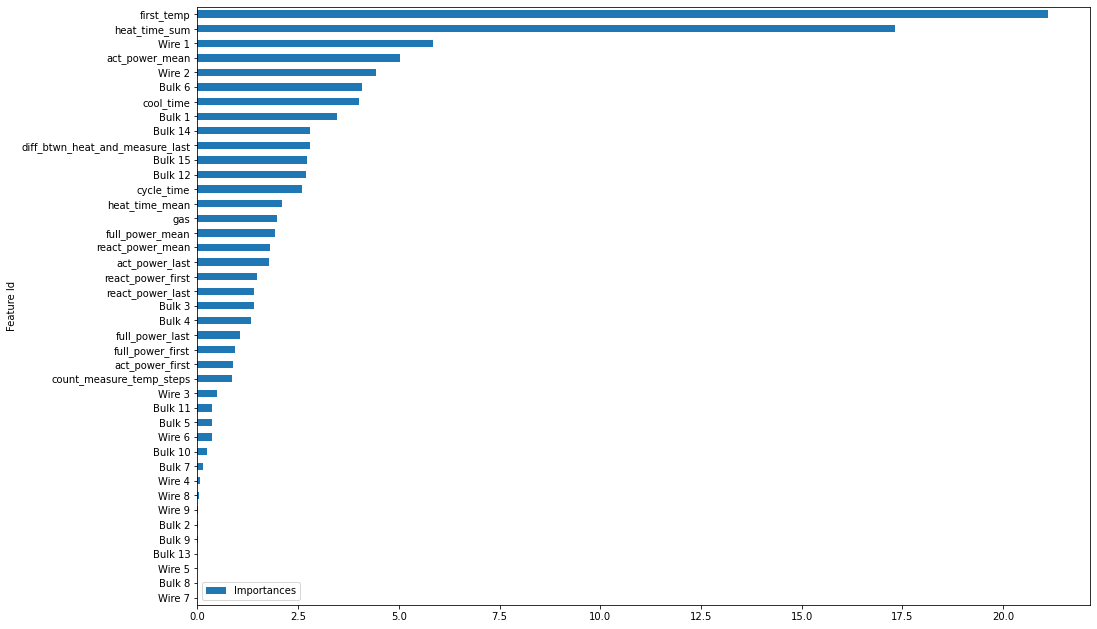